### from https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

# Bostern 집값 데이터
0 - CRIM: 지역별 범죄 발생률

1 - ZN: 25,000평방피트를 초과하는 거주 지역의 비율

2 - NDUS: 비상업 지역 넓이 비율

3 - CHAS: 찰스강에 대한 더미 변수(강의 경계에 위치한 경우는 1, 아니면 0)

4 - NOX: 일산화질소 농도

5 - RM: 거주할 수 있는 방 개수

6 - AGE: 1940년 이전에 건축된 소유 주택의 비율

7 - DIS: 5개 주요 고용센터까지의 가중 거리

8 - RAD: 고속도로 접근 용이도

9 - TAX: 10,000달러당 재산세율

10 - PTRATIO: 지역의 교사와 학생 수 비율

11 - B: 지역의 흑인 거주 비율

12 - LSTAT: 하위 계층의 비율

13 - PRICE: 본인 소유의 주택 가격(중앙값) - 종속변수 (위의 건 독립변수)

Boston 13 columns

12번 열인 LSTAT 중요도?
- 12개 + LSTAT => 모델 학습 => mse 계산 : mse 1
- 12개         => 모델 학습 => mse 계산 : mse 2

mse2 - mse1 -> LASTAT가 기여한 에러 감소량

[Permutation Importance]

12개 + LSTAT[12번열] = 13개의 열
=> 모델 학습

=> train 데이터 기준 model predict 후 mse 계산 -> mse_1(mean_squred_error)

=> train 데이텅에서 LSTAT(12번) 열을 기준으로 위아래로 랜덤하게 섞음 => model predict 후 mse 계산 => mse_2(mean_squred_error)

=> mse_2 - mse_1 -> LSTAT가 기여한 에러 감소량

In [2]:
!pip show scikit-learn

Name: scikit-learn
Version: 0.24.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\programdata\anaconda3\lib\site-packages
Requires: threadpoolctl, scipy, joblib, numpy
Required-by: vecstack, lightgbm, imbalanced-learn


In [1]:
import sklearn

sklearn.__version__

'0.24.1'

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.inspection import permutation_importance 
# if you want to use this func., upgrade the scikit-learn to 0.23.1 (https://j.mp/334YxRi)

In [31]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target



In [32]:
# import pandas as pd

# pd.DataFrame(diabetes['target'])

print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13)

# loss : 'ls' ==> Least Squares Estimation :: 최소제곱법
params = {'n_estimators': 2000,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}

In [34]:
# GradientBoostingRegressor
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3473.3550


GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=2000)

In [14]:
reg.feature_importances_
sum(reg.feature_importances_)

0.9999999999999999

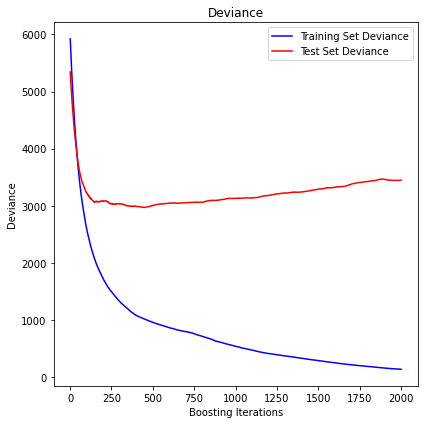

In [7]:
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = reg.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, reg.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [8]:
reg.feature_importances_

array([0.061823  , 0.01321289, 0.29954439, 0.07486626, 0.03677334,
       0.07194332, 0.04598548, 0.02836688, 0.29219585, 0.0752886 ])

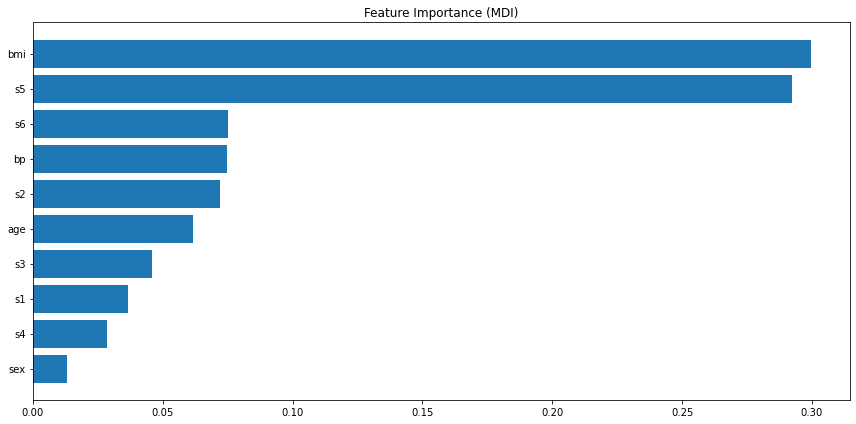

In [9]:
feature_importance = reg.feature_importances_

sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

fig = plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title('Feature Importance (MDI)')

# result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
# sorted_idx = result.importances_mean.argsort()
# plt.subplot(1, 2, 2)
# plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
# plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()

In [15]:
reg.score(X_test, y_test)

# - Regression     -> model.score(x, y) == R2 score (1에 가까울수록 모델의 설명력이 좋음 vs 0에 가까울수록 모델의 설명력이 떨어짐)
# - Classification -> model.score(x, y) == Accuracy score (1에 가까울수록 모델이 분류를 정확하게 해냄)

0.3381964443594423

In [16]:
sum(result['importances_mean'])

0.7719771444492001

In [17]:
# n_repeats = 몇 번 반복할 것인지 n_jobs = 병렬적으로 처리하기 위해서 == Thread :: 보통 -1
result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
result

{'importances_mean': array([-0.00149848,  0.00326376,  0.29352619,  0.08845981, -0.0277835 ,
        -0.01250664, -0.01172158,  0.00698071,  0.40398918,  0.02926768]),
 'importances_std': array([0.03820375, 0.01780783, 0.068419  , 0.0680171 , 0.02147959,
        0.033016  , 0.02732783, 0.01848913, 0.11269887, 0.02218935]),
 'importances': array([[-6.88530496e-03, -6.06776604e-02,  9.62208885e-03,
          3.27443828e-02, -4.63641417e-02, -3.21018289e-02,
          1.98226353e-02,  6.79090207e-02,  2.82090473e-02,
         -2.72630268e-02],
        [-1.10960446e-02,  3.72407639e-02,  1.39968765e-02,
         -1.06008084e-02, -5.50487312e-03,  4.13977142e-04,
          1.16978048e-02,  2.75371702e-02, -2.06151275e-02,
         -1.04321307e-02],
        [ 3.05326407e-01,  2.68355320e-01,  4.34641076e-01,
          2.03255122e-01,  3.56135887e-01,  3.08874890e-01,
          2.74104759e-01,  2.42762004e-01,  2.00749285e-01,
          3.41057161e-01],
        [-1.56783088e-02,  1.95862010e-

In [25]:
# mse를 각각의 열에대해서 10번을 한 것
df = pd.DataFrame(result['importances'], columns=['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'])
'''
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level
'''


0.8052273112034618

In [26]:
result['importances'].mean(axis=1)

array([-0.00149848,  0.00326376,  0.29352619,  0.08845981, -0.0277835 ,
       -0.01250664, -0.01172158,  0.00698071,  0.40398918,  0.02926768])

In [29]:
result['importances_mean']

array([-0.00149848,  0.00326376,  0.29352619,  0.08845981, -0.0277835 ,
       -0.01250664, -0.01172158,  0.00698071,  0.40398918,  0.02926768])

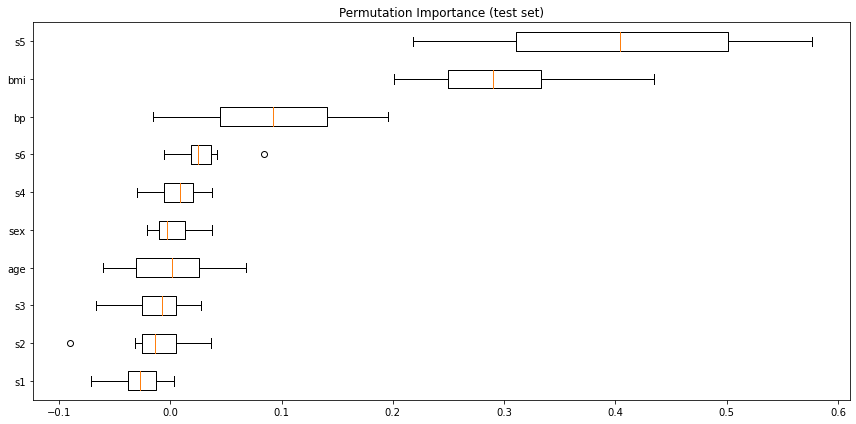

In [30]:
fig = plt.figure(figsize=(12, 6))

result = permutation_importance(reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(diabetes.feature_names)[sorted_idx])
plt.title("Permutation Importance (test set)")

fig.tight_layout()
plt.show()